In [2]:
from google.colab import files
uploaded = files.upload()


Saving df_sample_with_answers_328.csv to df_sample_with_answers_328.csv
Saving ragas_per_question_scores.csv to ragas_per_question_scores.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

df_ragas = pd.read_csv("/content/ragas_per_question_scores.csv")
df_full = pd.read_csv("/content/df_sample_with_answers_328.csv")

df_ragas.head(), df_full.head()


(                                          user_input  \
 0      \nما هي المناطق التي شملتها إمبراطورية السيخ؟   
 1              متى تم عرض المسلسل  "صيفنا الحبيب ؟\n   
 2        من هم كبار السن حسب تعريف دولة إسرائيل؟\n\n   
 3      ما هي عدم التحمل في نظام الطاقة الكهربائية؟\n   
 4  ما هو دور الإلكترونيات في مجال الهندسة الكهربا...   
 
                                   retrieved_contexts  \
 0  ['السيخية (بالبنجابيَّة: ਸਿੱਖੀ) هي ديانة توحيد...   
 1  ['صيفنا الحبيب (هانغل: 그 해 우리는)؛ هو مسلسل تلفز...   
 2  ['"العنف ضد كبار السن" هو مصطلح يشير إلى السلو...   
 3  ['عدم التحمل في نظام الطاقة الكهربائية هي الحا...   
 4  ['الهندسة الكهربائية هي تخصص يهتم بدراسة وتطبي...   
 
                                             response  \
 0   إمبراطورية السيخ هي إمبراطورية إسبانية، وتمت ...   
 1        تم عرض المسلسل  "صيفنا الحبيب ؟" في  2023م.   
 2   كبار السن حسب تعريف دولة إسرائيل هما الأشخاص ...   
 3   عدم التحمل هو نظام طاقة كهربائية يعتمد على إن...   
 4   الإلكترونيات هي أدوات 

In [6]:
metrics = ['faithfulness',
           'answer_relevancy',
           'context_precision',
           'context_recall',
           'answer_correctness']

print("Metrics:", metrics)



Metrics: ['faithfulness', 'answer_relevancy', 'context_precision', 'context_recall', 'answer_correctness']


In [7]:
mean_scores = df_ragas[metrics].mean()
print(mean_scores)


faithfulness          0.208333
answer_relevancy      0.520715
context_precision     0.573171
context_recall        0.826773
answer_correctness    0.413101
dtype: float64


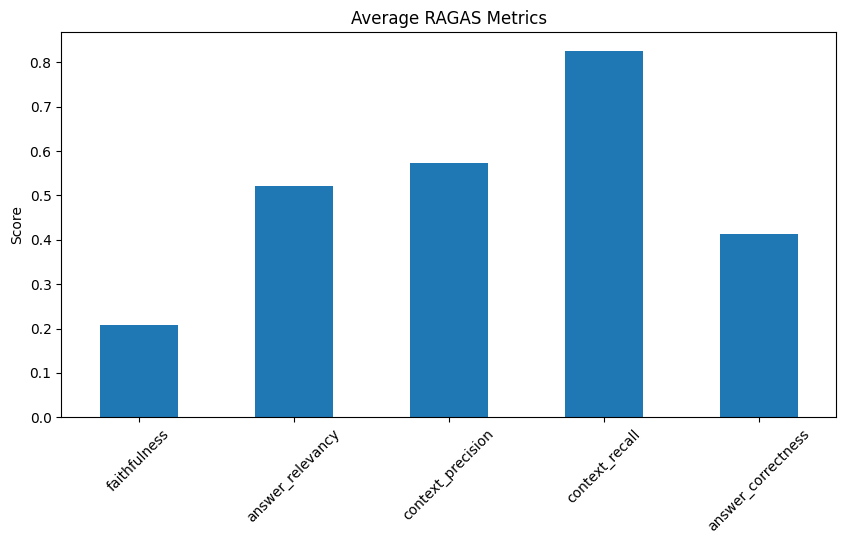

In [8]:
plt.figure(figsize=(10,5))
mean_scores.plot(kind='bar')
plt.title("Average RAGAS Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


The bar chart illustrates the average performance of the model across the five RAGAS evaluation metrics. Each metric measures a different aspect of how well the RAG system retrieves information and generates answers.

Here’s the interpretation of the results:

1. Faithfulness (≈ 0.20)
This is the weakest metric. A low score means the model frequently generates information that is not fully grounded in the retrieved context, indicating the presence of hallucinations or unsupported statements.

2. Answer Relevancy (≈ 0.52)
The model generally produces answers that are relevant to the user query. This suggests it understands the question, even if the final response is not always reliable.

3. Context Precision (≈ 0.57)
This score indicates that the retrieved context is somewhat relevant but not always the most precise or informative part of the documents. The system retrieves useful information, but not consistently the best segments.

4. Context Recall (≈ 0.83)
This is the strongest metric. A high score shows that the retrieval step successfully gathers a sufficient amount of relevant information, even if some irrelevant content is mixed in. The system is good at retrieving broadly related context.

5. Answer Correctness (≈ 0.41)
The answer is partially correct on average. The model captures parts of the correct information, but the responses often lack full accuracy or completeness.

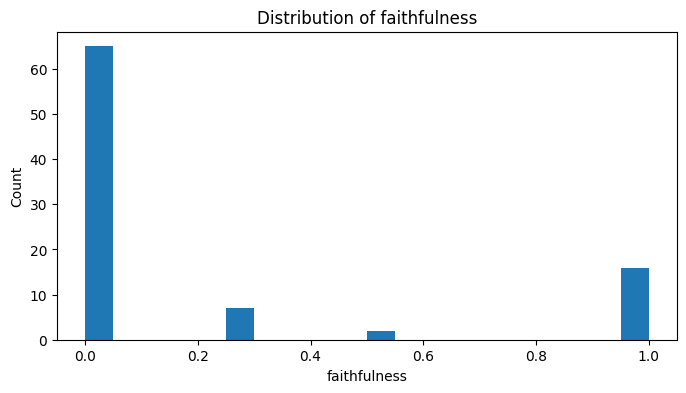

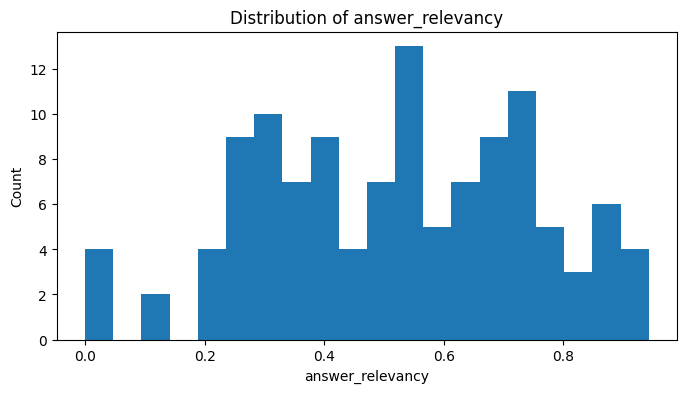

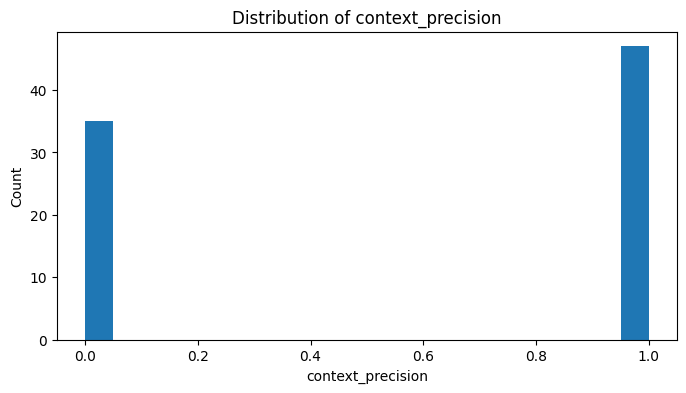

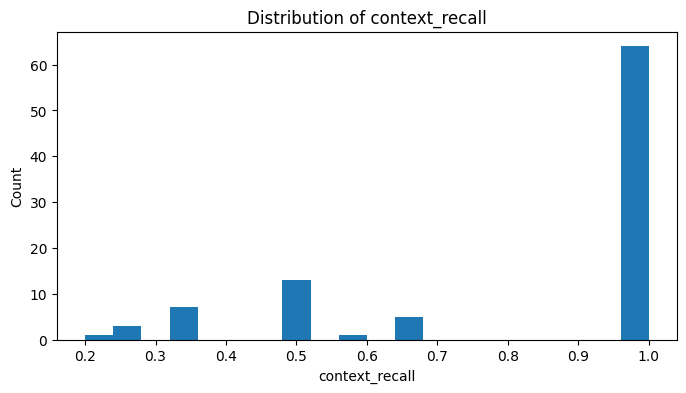

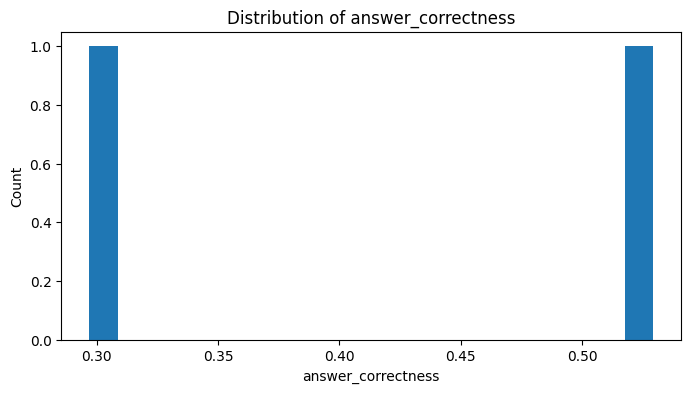

In [11]:
for col in metrics:
    plt.figure(figsize=(8,4))
    plt.hist(df_ragas[col].dropna(), bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


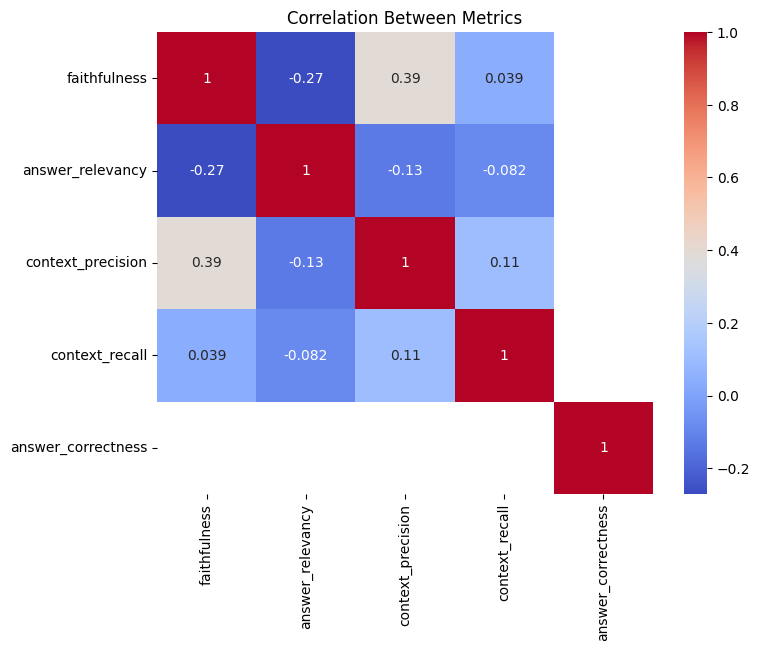

In [13]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df_ragas[metrics].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Metrics")
plt.show()


The correlation heatmap shows that most RAGAS metrics have weak relationships with each other, indicating that each metric captures a different aspect of the model’s performance.
A mild positive correlation exists between context_precision and faithfulness, suggesting that more precise retrieved context contributes to more faithful answers.
Meanwhile, answer_relevancy and context_recall show almost no correlation, meaning the model can produce relevant answers even when it does not retrieve all correct context segments.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/df_sample_with_answers_328.csv")
df.head()


,context,question,ground_truth,model_answer
0,السيخية (بالبنجابيَّة: ਸਿੱਖੀ) هي ديانة توحيدية...,\nما هي المناطق التي شملتها إمبراطورية السيخ؟,كشمير (أقصى شمال شبه القارة الهندية)، ولداخ (إ...,إمبراطورية السيخ هي إمبراطورية إسبانية، وتمت ...
1,صيفنا الحبيب (هانغل: 그 해 우리는)؛ هو مسلسل تلفزيو...,"متى تم عرض المسلسل ""صيفنا الحبيب ؟\n",من 6 ديسمبر 2021,"تم عرض المسلسل ""صيفنا الحبيب ؟"" في 2023م."
2,"""العنف ضد كبار السن"" هو مصطلح يشير إلى السلوك ...",من هم كبار السن حسب تعريف دولة إسرائيل؟\n\n,الذي يتجاوز عمرهم ال 65 سنة,كبار السن حسب تعريف دولة إسرائيل هما الأشخاص ...
3,عدم التحمل في نظام الطاقة الكهربائية هي الحالة...,ما هي عدم التحمل في نظام الطاقة الكهربائية؟\n,الحالة التي يكون فيها فقدان التحمل المفاجئ في ...,عدم التحمل هو نظام طاقة كهربائية يعتمد على إن...
4,الهندسة الكهربائية هي تخصص يهتم بدراسة وتطبيقا...,ما هو دور الإلكترونيات في مجال الهندسة الكهربا...,.,الإلكترونيات هي أدوات تتبع وتحليل وتحسين وتحس...


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def compute_similarity(row):
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([str(row['ground_truth']), str(row['model_answer'])])
    return cosine_similarity(tfidf[0], tfidf[1])[0][0]

df["similarity"] = df.apply(compute_similarity, axis=1)
df.head()


,context,question,ground_truth,model_answer,similarity
0,السيخية (بالبنجابيَّة: ਸਿੱਖੀ) هي ديانة توحيدية...,\nما هي المناطق التي شملتها إمبراطورية السيخ؟,كشمير (أقصى شمال شبه القارة الهندية)، ولداخ (إ...,إمبراطورية السيخ هي إمبراطورية إسبانية، وتمت ...,0.003468
1,صيفنا الحبيب (هانغل: 그 해 우리는)؛ هو مسلسل تلفزيو...,"متى تم عرض المسلسل ""صيفنا الحبيب ؟\n",من 6 ديسمبر 2021,"تم عرض المسلسل ""صيفنا الحبيب ؟"" في 2023م.",0.000000
2,"""العنف ضد كبار السن"" هو مصطلح يشير إلى السلوك ...",من هم كبار السن حسب تعريف دولة إسرائيل؟\n\n,الذي يتجاوز عمرهم ال 65 سنة,كبار السن حسب تعريف دولة إسرائيل هما الأشخاص ...,0.056644
3,عدم التحمل في نظام الطاقة الكهربائية هي الحالة...,ما هي عدم التحمل في نظام الطاقة الكهربائية؟\n,الحالة التي يكون فيها فقدان التحمل المفاجئ في ...,عدم التحمل هو نظام طاقة كهربائية يعتمد على إن...,0.069568
4,الهندسة الكهربائية هي تخصص يهتم بدراسة وتطبيقا...,ما هو دور الإلكترونيات في مجال الهندسة الكهربا...,.,الإلكترونيات هي أدوات تتبع وتحليل وتحسين وتحس...,0.000000


In [21]:
df_sorted = df.sort_values("similarity", ascending=False)

best_5 = df_sorted.head(5)
worst_5 = df_sorted.tail(5)


In [26]:
print("===== WORST 5 =====")
for idx, row in worst_5.iterrows():
    print("QUESTION:", row["question"])
    print("GROUND TRUTH:", row["ground_truth"])
    print("MODEL ANSWER:", row["model_answer"])
    print("SIMILARITY SCORE:", row["similarity"])
    print("-" * 80)



===== WORST 5 =====
QUESTION: ما هو تاريخ الأدوات الأشولينية التي تم اكتشافها ؟
GROUND TRUTH: .
MODEL ANSWER:  تاريخ الأدوات الأشولينية يعتبر من أهم الأبحاث في مجال الأدوات الأشولينية. تم اكتشافها في عام 2000 من قبل جيرار كوفير، وهو عالم أثرية إسباني. تم اكتشافها في بلش مالقة في إسبانيا. تم اكتشافها من خلال تحليل الأثرية القديمة في بلش مالقة. تم اكتشافها من خلال تحليل الأثرية القديمة في بلش مالقة. تم اكتشافها من خلال تحليل الأثرية القديمة في بلش مالقة. تم اكتشافها من خلال تحليل الأثرية القديمة في بلش مالقة. تم اكتشافها من خلال تحليل الأثرية القديمة في بلش مالقة. تم اكتشافها من خلال تحليل الأثرية القديمة في بلش مالقة. تم اكتشافها من خلال تحليل الأثرية القديمة في بلش مالقة. تم اكتشافها من خلال تحليل الأثرية القديمة في بلش مالقة. تم اكتشافها من خلال تح
SIMILARITY SCORE: 0.0
--------------------------------------------------------------------------------
QUESTION: متى تم عرض المسلسل  "صيفنا الحبيب ؟

GROUND TRUTH: من 6 ديسمبر 2021
MODEL ANSWER:  تم عرض المسلسل  "صيفنا الحبيب ؟" في  2023م.


In [25]:
print("===== BEST 5 =====")
for idx, row in best_5.iterrows():
    print("QUESTION:", row["question"])
    print("GROUND TRUTH:", row["ground_truth"])
    print("MODEL ANSWER:", row["model_answer"])
    print("SIMILARITY SCORE:", row["similarity"])
    print("-" * 80)


===== BEST 5 =====
QUESTION: متي ولد أنطونيو هييرو؟
GROUND TRUTH:  5 يوليو 1959
MODEL ANSWER: 5 يوليو 1959.
SIMILARITY SCORE: 1.0000000000000002
--------------------------------------------------------------------------------
QUESTION: متي ولد خليل رونتري جونير؟
GROUND TRUTH:  26 فبراير 1990
MODEL ANSWER: 26 فبراير 1990.
SIMILARITY SCORE: 1.0000000000000002
--------------------------------------------------------------------------------
QUESTION: ما هو مركز لعب فالنتين إيروكين ؟
GROUND TRUTH: الوسط
MODEL ANSWER:  الوسط.
SIMILARITY SCORE: 1.0
--------------------------------------------------------------------------------
QUESTION: ما هو مركز كريستيان مارسيلو ألفاريز؟
GROUND TRUTH:  الوسط
MODEL ANSWER:  الوسط.
SIMILARITY SCORE: 1.0
--------------------------------------------------------------------------------
QUESTION: متى من المقرر إطلاق مهمة لونا 26؟

GROUND TRUTH: 2024م
MODEL ANSWER: 2024م.
SIMILARITY SCORE: 1.0
----------------------------------------------------------------------

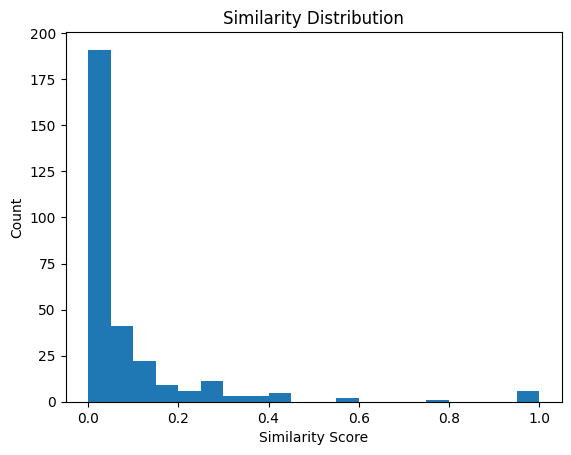

In [27]:
plt.hist(df["similarity"], bins=20)
plt.title("Similarity Distribution")
plt.xlabel("Similarity Score")
plt.ylabel("Count")
plt.show()
